<a href="https://colab.research.google.com/github/thepankaj018/ML-Projects/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT :

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [ ]:
# importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
file_path = '/content/drive/MyDrive/Projects/Fare Flight Prediction/Data_Train.xlsx'

In [ ]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_excel(file_path)

In [ ]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns

In [ ]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6841,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,20:30,13:45 02 May,17h 15m,2 stops,No info,15164
8472,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:25,4h 40m,1 stop,In-flight meal not included,9134
4302,IndiGo,12/06/2019,Kolkata,Banglore,CCU → BLR,11:30,14:05,2h 35m,non-stop,No info,4804
2853,Air India,18/05/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00,11:10 19 May,23h 10m,2 stops,No info,10676
9420,Jet Airways,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 07 May,12h 10m,1 stop,No info,14388


In [ ]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 10683
No of Columns: 11


In [ ]:
# checking datatypes of variables present in the dataset
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Comment :
. Training dataset contain 10683 rows and 11 columns.

. Our Target variable is Price. We gone predict flight prices using     Random Forest Algorithms.

. Some feature with date and time related columns are mention with object datatype. We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

#### Details of Feature engineering operation over various datetime datatype feature
- **We know that flight price vary according to season,demand and festival offer like new year, diwali. Considering this Date of joureny is seem like important feature affecting variation of flight price.**
- From excel file we know that all data belong to 2019. So year doesnot matter.
- We gone split Date of journey into date and month columns.
- **Conversion of duration column into new columns represnting duration in min.**
- Extracting Hour and minutes from Dep_Time and Arrival Time columns.

In [ ]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7920,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,2022-09-20 11:40:00,2022-09-20 20:20:00,8h 40m,1 stop,In-flight meal not included,11087
7610,Jet Airways,2019-05-24,Kolkata,Banglore,CCU → BOM → BLR,2022-09-20 20:00:00,2022-05-25 04:40:00,8h 40m,1 stop,No info,13731
3751,Air Asia,2019-06-15,Kolkata,Banglore,CCU → BLR,2022-09-20 19:55:00,2022-09-20 22:25:00,2h 30m,non-stop,No info,4107
8611,IndiGo,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,2022-09-20 07:30:00,2022-09-20 12:20:00,4h 50m,1 stop,No info,8110
9923,Air India,2019-09-06,Kolkata,Banglore,CCU → BOM → BLR,2022-09-20 09:25:00,2022-09-20 18:30:00,9h 5m,1 stop,No info,8576


**1. Feature Engineering on Date of Journey Columns**

In [ ]:
# Extracting Day from Date_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/Y").dt.month

# Dropping Date_of_journey column
df.drop("Date_of_Journey",axis=1,inplace=True)


**2. Feature Engineering on 'Duration' Column**

In [ ]:
#Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)


**3. Feature Engineering on 'Dep_Time' Column**

In [ ]:
# Extracting Hours from Dep_Time column
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Dropping Dep_Time column
df.drop('Dep_Time',axis = 1,inplace = True)

**4. Feature Engineering on 'Arrival_Time' Column**

In [ ]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

In [ ]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'], object: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']}

In [ ]:
# Spliting data into categorical and Numerical Variable
Numerical = ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Min']

Categorical = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Lokking for different unique values in categorical variable and afterwards we will perform feature engineering.

In [ ]:
for elem in Categorical:
  print(f'value counts for {elem} in datafreme are ')
  print('-'*50)
  print(df[elem].value_counts())
  print("*"*100)


value counts for Airline in datafreme are 
--------------------------------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************************************************************************
value counts for Source in datafreme are 
--------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
********************************************************************

#### Observation :
- "New Delhi" is mention as "Delhi". We we gone regulated it.
- No info is mention as 'No Info' few times.
- **Very Few Premium economy or Business class flight in dataset. This might be due to high ticket price**

In [ ]:
# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [ ]:
df.duplicated().sum()

222

**Around 222 duplicate data rows. It huge and we gone drop them. There is no point on training model on duplicated data.**

In [ ]:
df.drop_duplicates(keep ='last',inplace = True)

<b> Let check if any whitespace, 'NA' or '-' exist in dataset. </b>

In [ ]:
df.isin([' ','NA','-','?']).sum().any()

False

In [ ]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Route                         1        0.009559
Total_Stops                   1        0.009559
Airline                       0        0.000000
Source                        0        0.000000
Destination                   0        0.000000
Duration                      0        0.000000
Additional_Info               0        0.000000
Price                         0        0.000000
Journey_Day                   0        0.000000
Journey_Month                 0        0.000000
Dep_Hour                      0        0.000000
Dep_Min                       0        0.000000
Arrival_Hour                  0        0.000000
Arrival_Min                   0        0.000000


** Missing values are present in Total Stops and Route. These variable are categorical in nature, we gone impute them with mode.**

In [ ]:
# Checking the mode of Categorical columns "Route" 
print("The mode of Route is:",df["Route"].mode())

# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Checking the mode of Categorical columns "Total_Stops"
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


### Statistical Matrix

In [ ]:
df.describe().T.style.background_gradient(cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Duration,10461.000000,629.945034,500.742197,5.000000,170.000000,505.000000,910.000000,2860.000000
Price,10461.000000,9027.212504,4624.861032,1759.000000,5224.000000,8266.000000,12346.000000,79512.000000
Journey_Day,10461.000000,12.629194,8.791165,3.000000,5.000000,6.000000,21.000000,27.000000
Journey_Month,10461.000000,5.535130,2.995285,1.000000,3.000000,5.000000,6.000000,12.000000
Dep_Hour,10461.000000,12.476341,5.726072,0.000000,8.000000,11.000000,18.000000,23.000000
Dep_Min,10461.000000,24.408278,18.817167,0.000000,5.000000,25.000000,40.000000,55.000000
Arrival_Hour,10461.000000,13.389638,6.853854,0.000000,8.000000,14.000000,19.000000,23.000000
Arrival_Min,10461.000000,24.723258,16.569495,0.000000,10.000000,25.000000,35.000000,55.000000


In [ ]:
df.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
4938,Jet Airways,Banglore,Delhi,BLR → DEL,175,non-stop,No Info,7229,21,4,15,15,18,10
9091,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,570,1 stop,No Info,13587,15,6,11,30,21,0
8926,SpiceJet,Delhi,Cochin,DEL → MAA → COK,380,1 stop,No Info,7317,6,1,15,45,22,5
472,IndiGo,Delhi,Cochin,DEL → BOM → COK,570,1 stop,No Info,6316,24,6,16,0,1,30
5199,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,1480,1 stop,No Info,14151,24,5,20,25,21,5


In [ ]:
df[Categorical].describe().T.style.background_gradient(cmap='RdPu')

,count,unique,top,freq
Airline,10461,12,Jet Airways,3700
Source,10461,5,Delhi,4346
Destination,10461,5,Cochin,4346
Route,10461,128,DEL → BOM → COK,2377
Total_Stops,10461,5,1 stop,5626
Additional_Info,10461,9,No Info,8184


In [ ]:
column = list(df.select_dtypes('int64'))
column

['Duration',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

<Figure size 432x288 with 0 Axes>

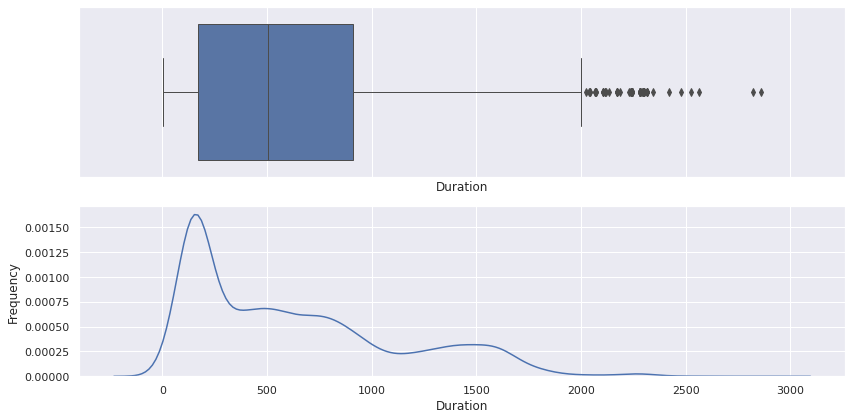

<Figure size 864x432 with 0 Axes>

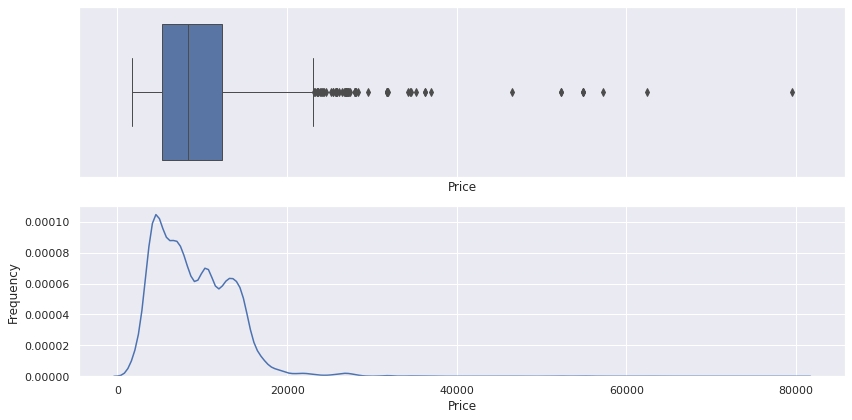

<Figure size 864x432 with 0 Axes>

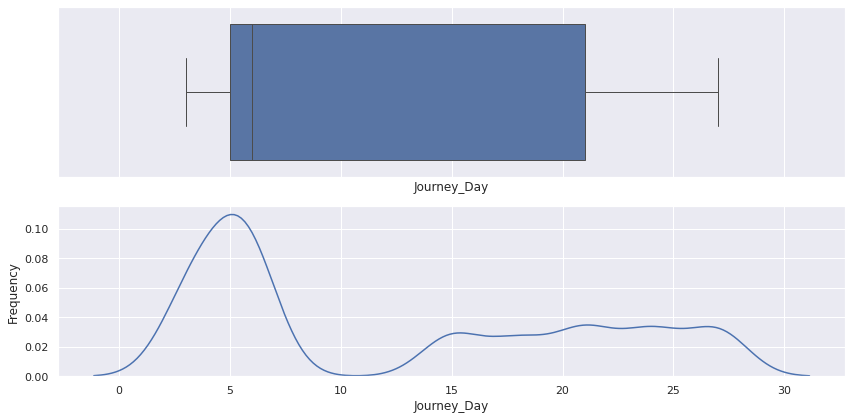

<Figure size 864x432 with 0 Axes>

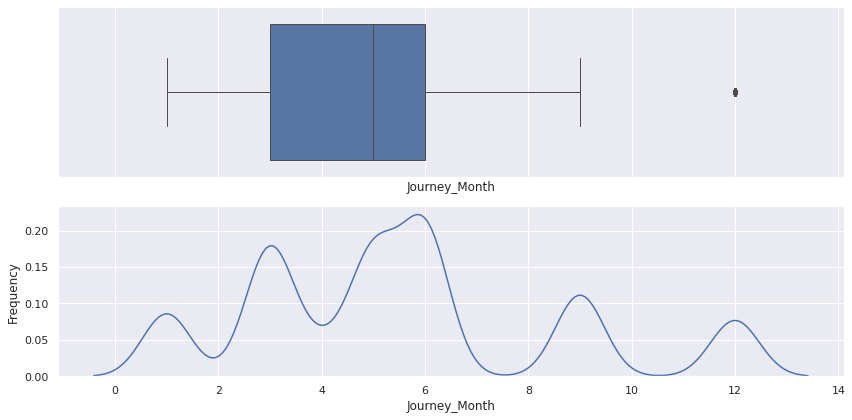

<Figure size 864x432 with 0 Axes>

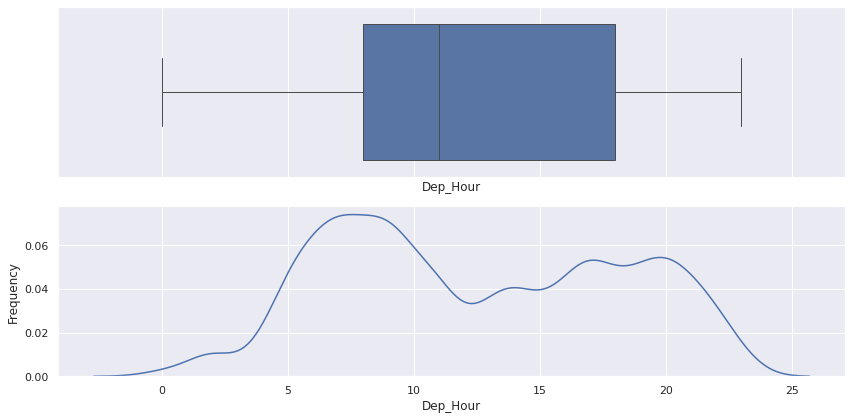

<Figure size 864x432 with 0 Axes>

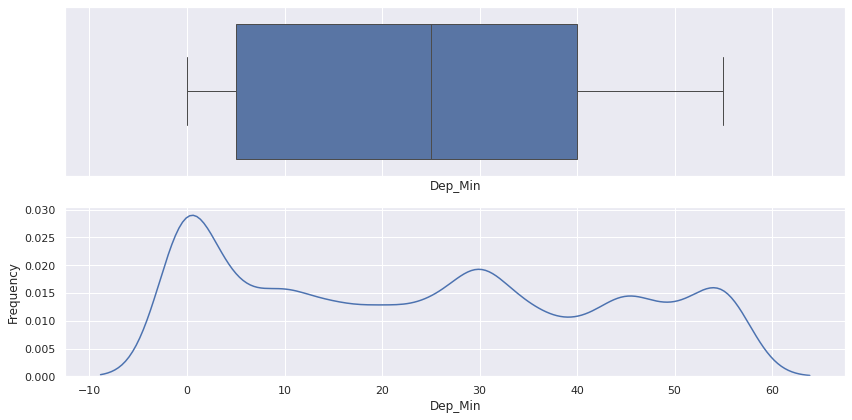

<Figure size 864x432 with 0 Axes>

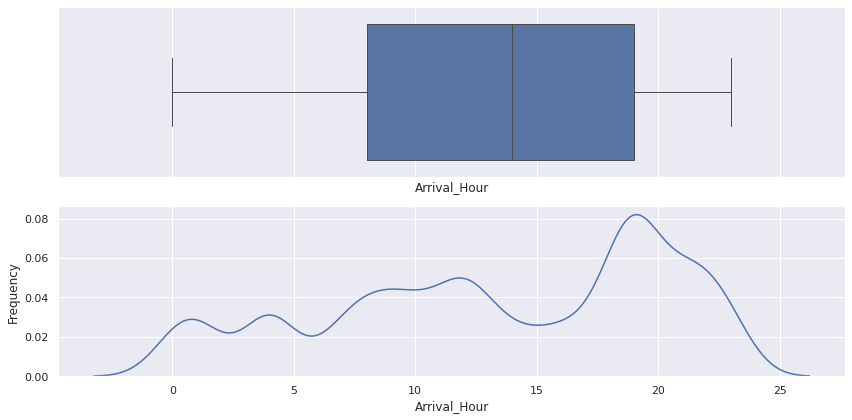

<Figure size 864x432 with 0 Axes>

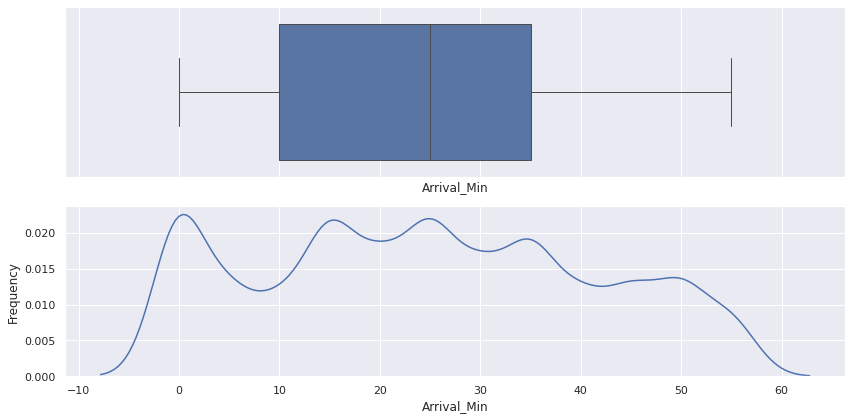

In [ ]:
for i in df[column]:
  plt.figure()
  plt.tight_layout()
  sns.set(rc={"figure.figsize":(12, 6)})

  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
  plt.gca().set(xlabel= i,ylabel='Frequency')
  sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
  sns.kdeplot(df[i])

#### Observation :
- The Minimum flight ticket price is Rs.1759 and Maximum flight ticket price is Rs.79512.
- The ( mean > median ) for Price,Journey_Day,Duration and Dep_Hour, <u>which mean right skew data.</u>
- The ( mean < median ) for Dep_Min,Arrival_Hour and Arrival_Min <u>which mean left skew data.</u>
- **Presense of outliers in Duration & Price columns as we see huge difference in 75% and max.**
- High value of std. deviation indicating spread of data.
- There are 12 airline in dataset with **maximum flight run by Jet Airways.**
- The data of 128 route in dataset and we find **maximum flight on route DEL → BOM → COK.**
- Long route flight have atleast one 1 stop.

## Exploring Features Source

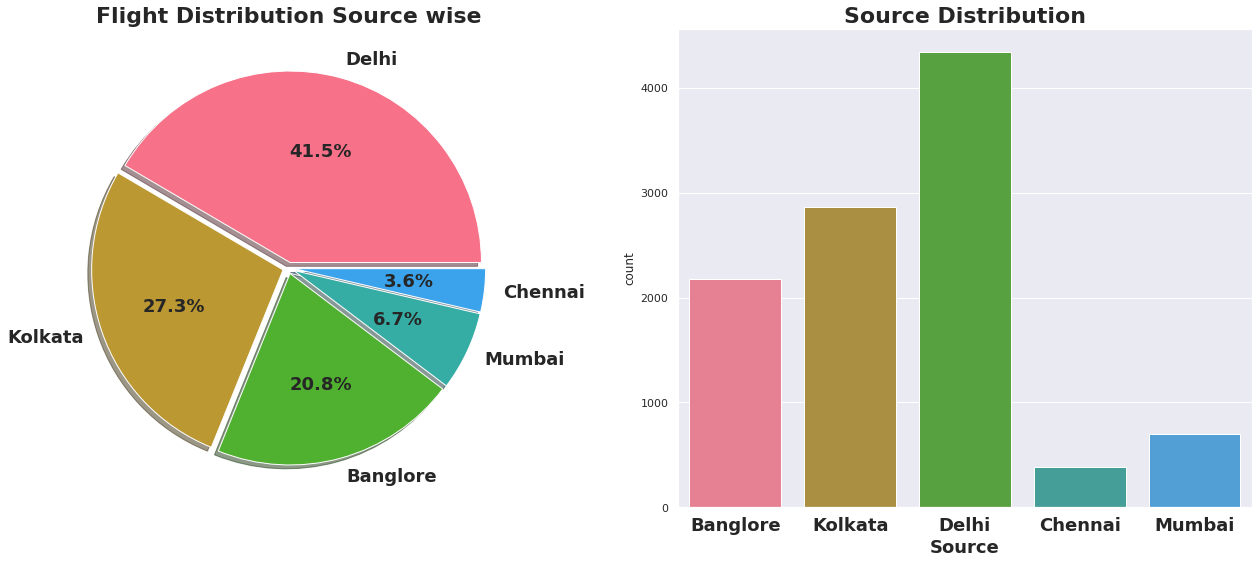

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Source wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Source',data=df,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Source",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation :
- **Maximum flight depart from Delhi followed by Kolkata.**

#### Let Explore Source With respect to Target Variable

<Figure size 864x504 with 0 Axes>

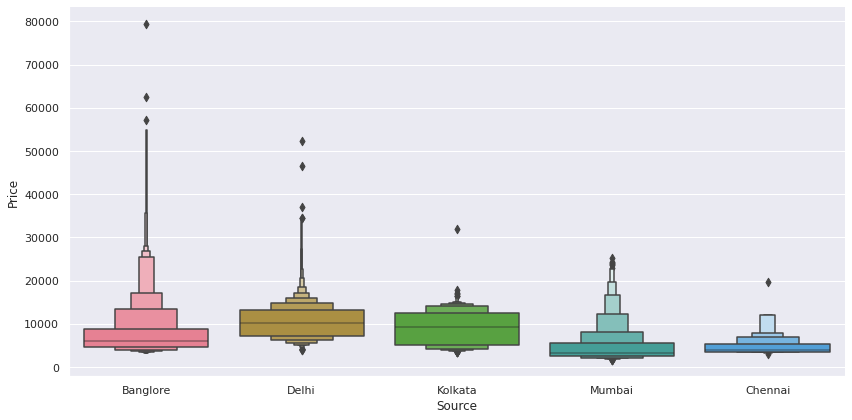

In [ ]:
# Source vs Average Price
plt.figure(figsize=(12,7))
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=2)
plt.show();

**Based upon Source location Maximum Fare Comes for Banglore flight.**

## Destination VS Price

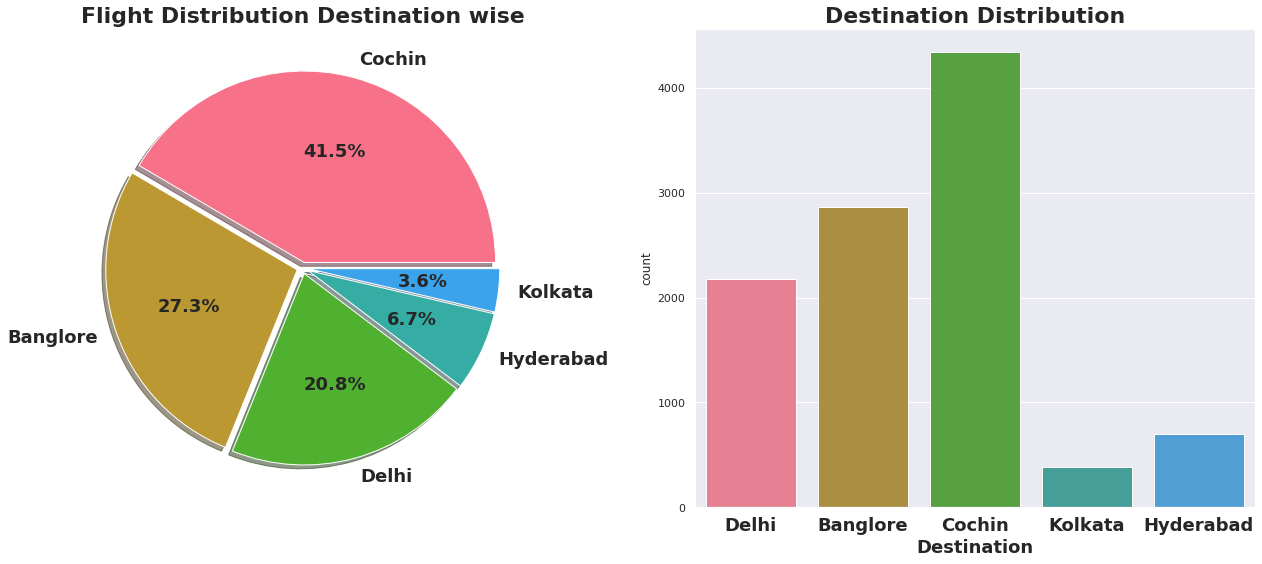

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Destination'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Destination wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Destination',data=df,ax=ax[1])
ax[1].set_title('Destination Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Destination",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

**Maximum 41.5% Flight lands into cochin followed by Banglore.**

<Figure size 864x504 with 0 Axes>

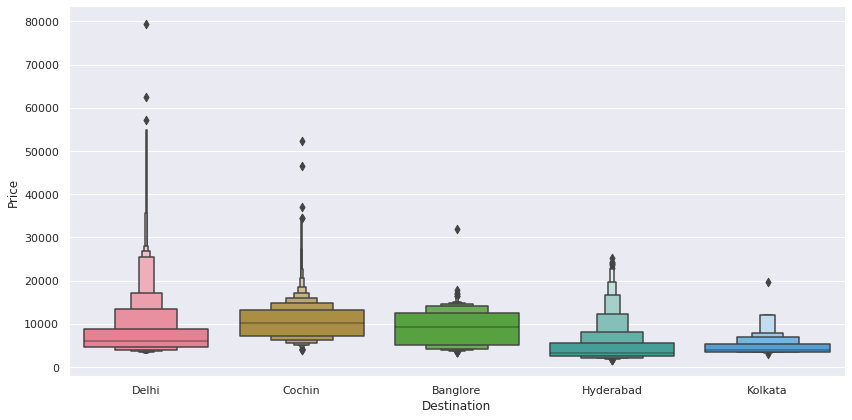

In [ ]:
# Source vs Average Price
plt.figure(figsize=(12,7))
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=2)
plt.show();

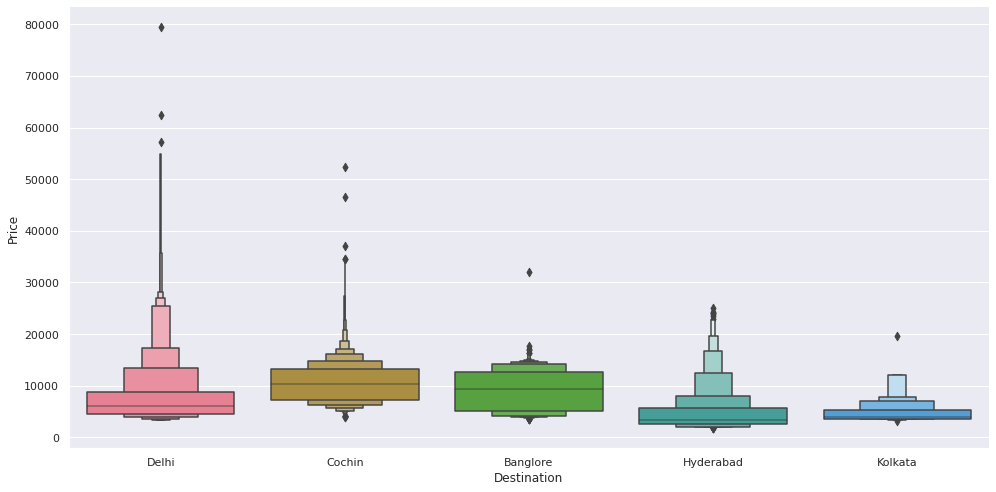

In [ ]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),
            kind = "boxen",height = 7, aspect = 2 )
plt.show()

**The Flight ticket price range in Delhi is the maximum, reason may be traffic & the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)**

### Airlines VS Source

In [ ]:
df.sample(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
2688,Air India,Delhi,Cochin,DEL → BOM → COK,675,1 stop,No Info,8879,18,5,8,0,19,15
5958,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,290,1 stop,No Info,4565,24,4,15,15,20,5
9068,Air India,Delhi,Cochin,DEL → JAI → BOM → COK,1180,2 stops,No Info,9653,27,6,12,0,7,40


Looking for Price Variation across different airlines

In [ ]:
df_1 = df.groupby('Airline',as_index = False).agg({'Price':'mean'})
df_1

,Airline,Price
0,Air Asia,5593.745283
1,Air India,9555.382891
2,GoAir,5861.056701
3,IndiGo,5668.469897
4,Jet Airways,11599.021081
5,Jet Airways Business,58358.666667
6,Multiple carriers,10902.678094
7,Multiple carriers Premium economy,11418.846154
8,SpiceJet,4335.841718
9,Trujet,4140.000000


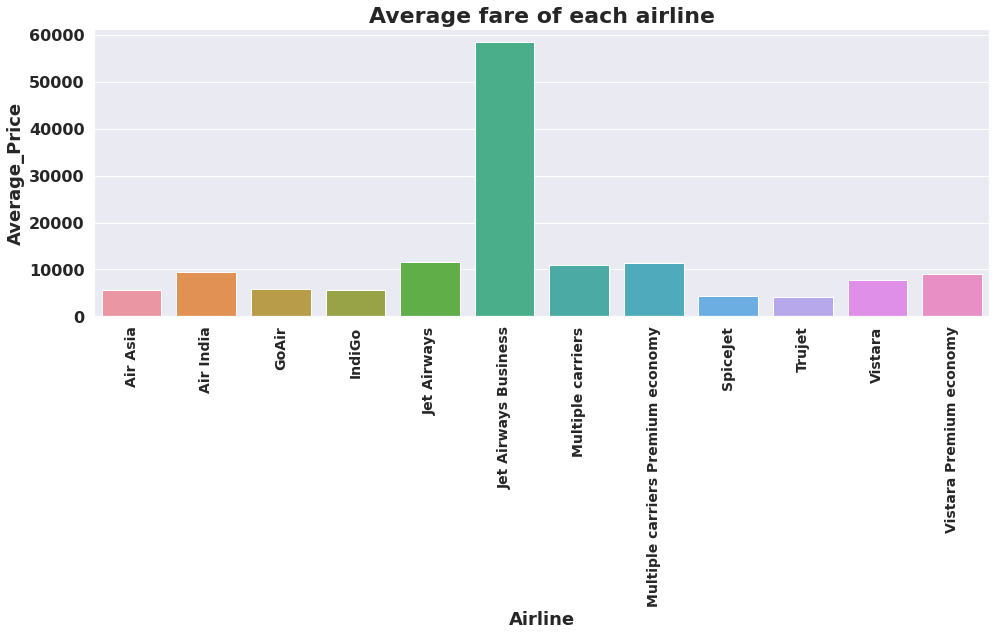

In [ ]:
plt.figure(figsize=(14,9))
sns.barplot(data = df_1,x = 'Airline',y = 'Price')
plt.title('Average fare of each airline',fontsize=22, fontweight='bold')
plt.xlabel('Airline', fontsize=18,fontweight='bold')
plt.ylabel('Average_Price', fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

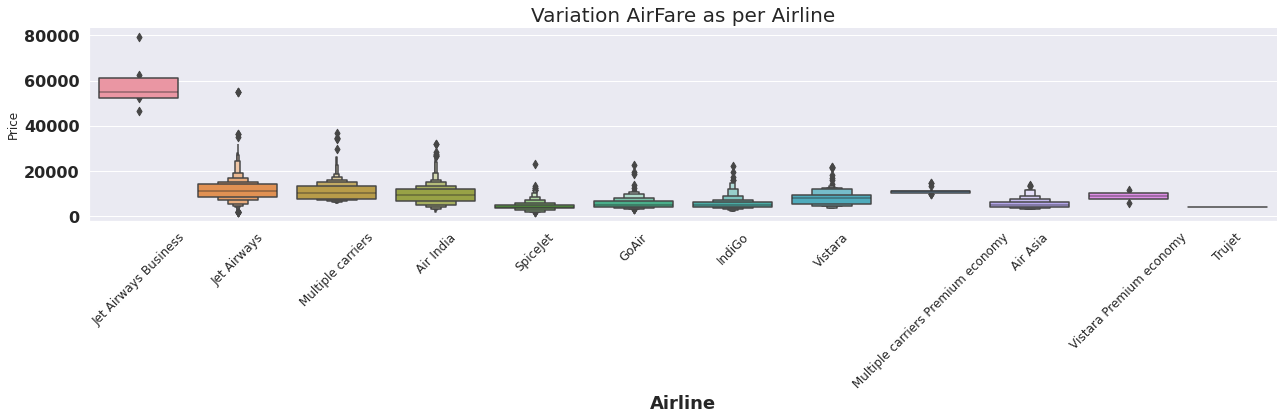

In [ ]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),
            kind="boxen",height=6, aspect=3)
plt.title("Variation AirFare as per Airline",fontsize=20)
plt.xlabel('Airline', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12,rotation = 45)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- Full service airlines Jet airways and Air India are always highly priced due to various amenities they provide.
- Low-cost carriers like indigo and spicejet have a lower and similar fare range

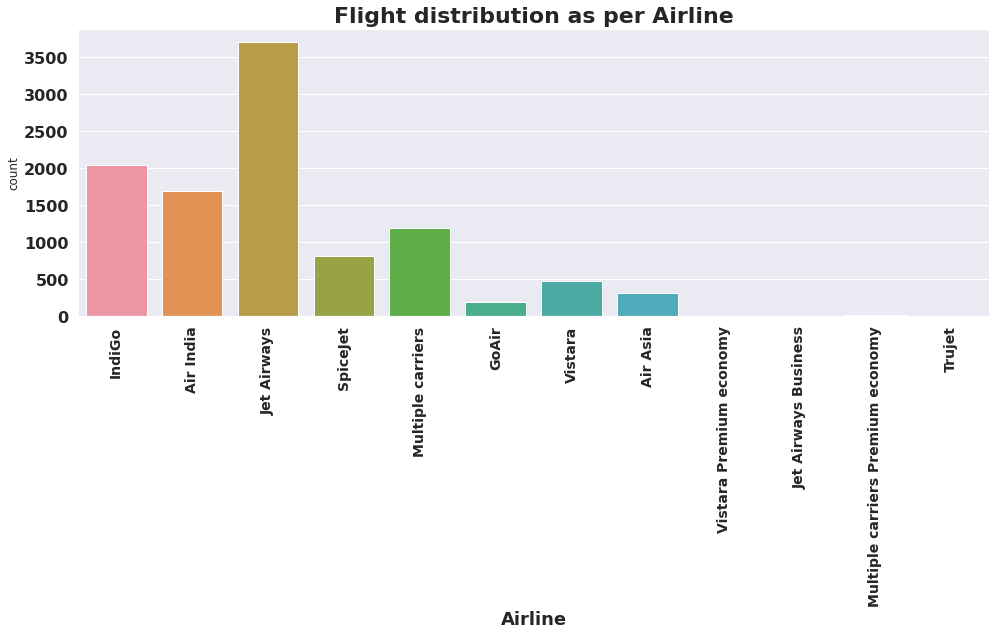

In [ ]:
# checking flight distribution
plt.figure(figsize=(14,9))
sns.countplot(df.Airline)
plt.title('Flight distribution as per Airline', fontsize=22, fontweight='bold')
plt.xlabel('Airline', fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()


- jet airways Airline runs highest number of flights out of all flights.
- **Very Few Premium class flights.**


## Duration VS Price

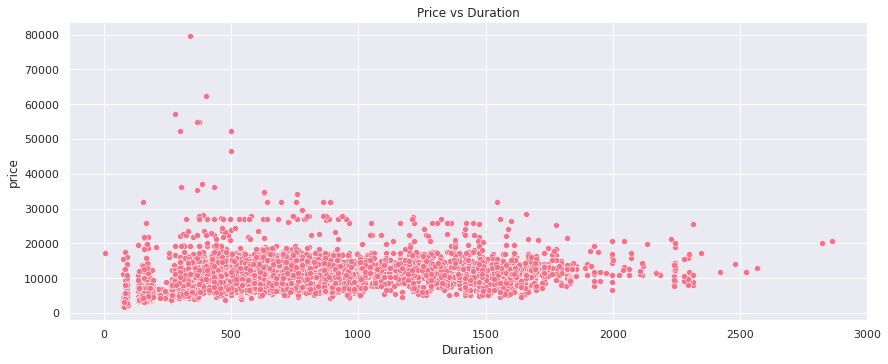

In [ ]:
sns.relplot(data = df,x = 'Duration',y = 'Price',height = 5,aspect = 2.5)
plt.xlabel('Duration')
plt.ylabel('price')
plt.title('Price vs Duration')
plt.show()

**We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)**

### Total Stops VS Price

In [ ]:
df.sample(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
7018,SpiceJet,Kolkata,Banglore,CCU → BLR,140,non-stop,No check-in baggage included,3841,6,9,22,20,0,40
8078,Air India,Delhi,Cochin,DEL → BLR → COK,795,1 stop,No Info,8907,6,3,9,45,23,0
7506,Jet Airways,Banglore,Delhi,BLR → DEL,165,non-stop,No Info,8016,6,12,6,0,8,45


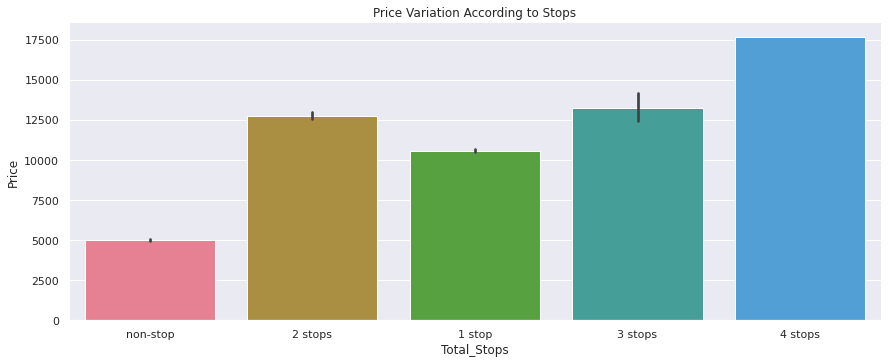

In [ ]:
sns.catplot(data = df,x = 'Total_Stops',y = 'Price',kind = 'bar',height = 5,aspect = 2.5)
plt.title('Price Variation According to Stops')
plt.show()

**As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.**

In [ ]:
df.sample()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
2327,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,In-flight meal not included,12373,18,5,17,30,4,25


In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

Now checking how the time of journey affect the fare price

In [ ]:
journey = ['Journey_Day','Journey_Month','Dep_Hour']

In [ ]:
for i in journey:
  print('-'*50)
  print(f'value counts for {i} are')
  print(df[i].value_counts())
  print('*'*100)

--------------------------------------------------
value counts for Journey_Day are
6     2114
5     1371
3     1343
27    1092
21    1085
24    1021
15     967
18     814
4      654
Name: Journey_Day, dtype: int64
****************************************************************************************************
--------------------------------------------------
value counts for Journey_Month are
6     2466
3     2167
5     2025
9     1375
1     1058
12     946
4      424
Name: Journey_Month, dtype: int64
****************************************************************************************************
--------------------------------------------------
value counts for Dep_Hour are
9     887
7     863
8     694
17    689
6     675
20    649
5     582
11    579
19    544
10    527
14    505
21    488
16    461
18    441
13    411
22    373
15    319
2     194
12    178
4     169
23    132
0      40
1      37
3      24
Name: Dep_Hour, dtype: int64
************************************

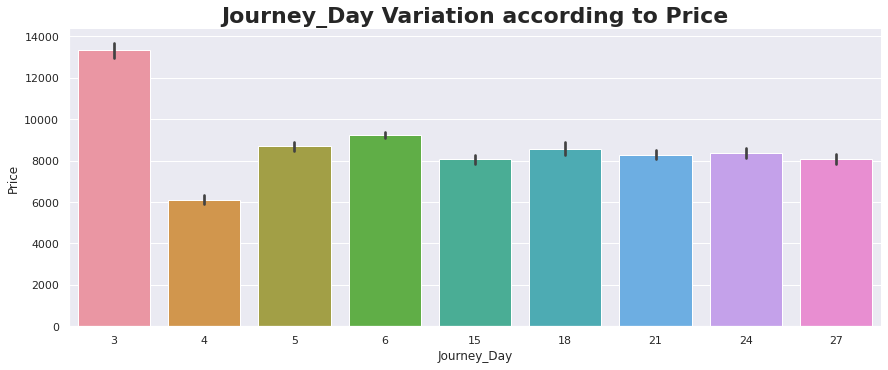

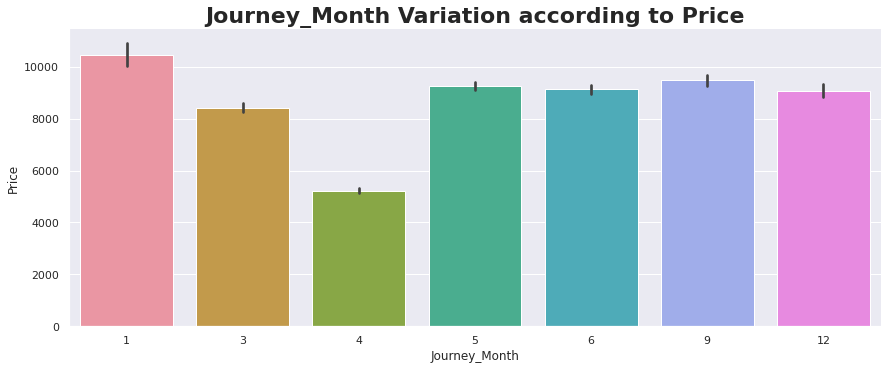

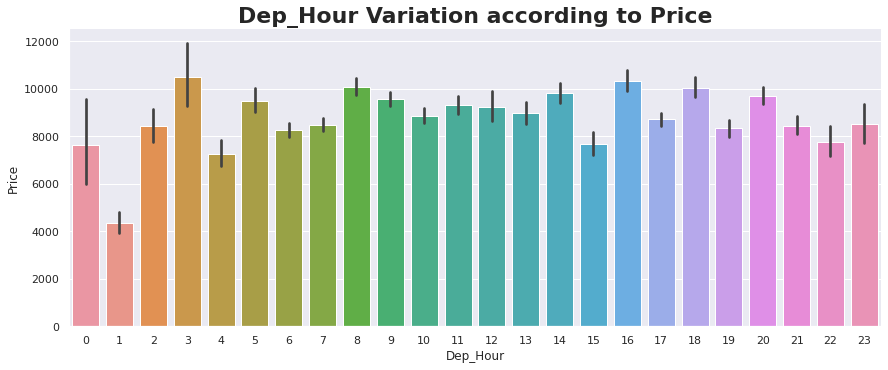

In [ ]:
for i in journey:
  df.groupby(i)['Price'].mean().reset_index()
  sns.catplot(data = df,x = i,y = 'Price',kind = 'bar',height = 5,aspect = 2.5)
  plt.title(f'{i} Variation according to Price',fontsize=22, fontweight='bold')



#### Observation :
- Airfare is high on Day 3 followed by Day 6.
- January month are most expensive than others while airfare least expensive in April month.

#Sumarising all the EDA:
###1.Maximum flight depart from Delhi followed by Kolkata.
###2.Based upon Source location Maximum Fare Comes for Banglore flight.
###3.Maximum 41.5% Flight lands into cochin followed by Banglore.
###4.The Flight ticket price range in Delhi is the maximum, reason may be traffic & the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
###5(a).jet airways Airline runs highest number of flights out of all flights.
###5(b).Very Few Premium class flights
###6(a).Full service airlines Jet airways and Air India are always highly priced due to various amenities they provide.
###6(b).Low-cost carriers like indigo and spicejet have a lower and similar fare range.
###7.We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday).
###8.As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.
###8(a).Airfare is high on Day 3 followed by Day 6.
###8(b).January month are most expensive than others while airfare least expensive in April month.

#Feature Selection & Engineering

##1.Outlier Removal

In [ ]:
# selecting numerical columns from dataframe
column = list(df.select_dtypes('int64'))
column

['Duration',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

<Figure size 864x432 with 0 Axes>

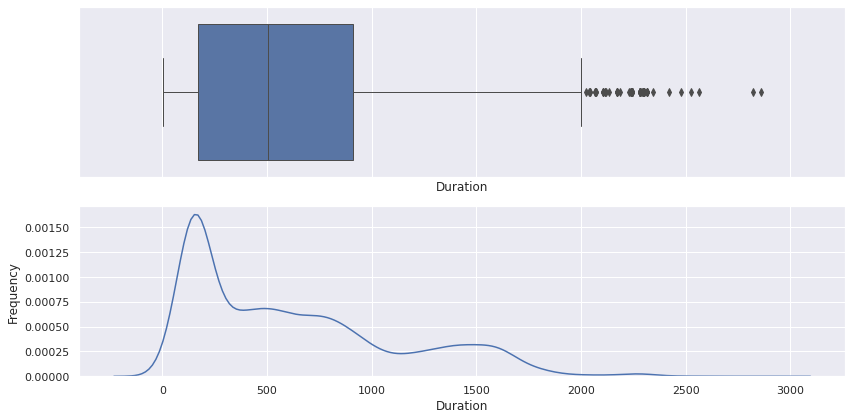

<Figure size 864x432 with 0 Axes>

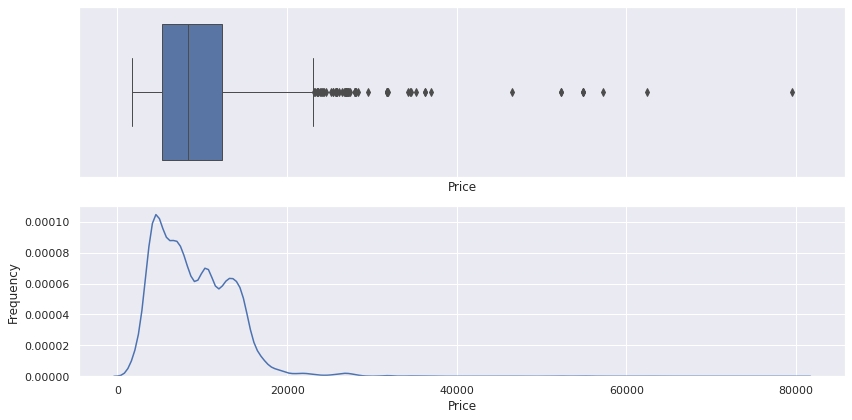

<Figure size 864x432 with 0 Axes>

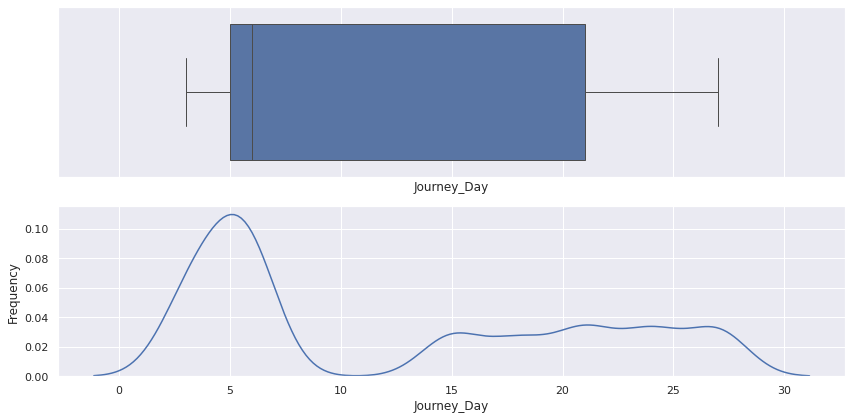

<Figure size 864x432 with 0 Axes>

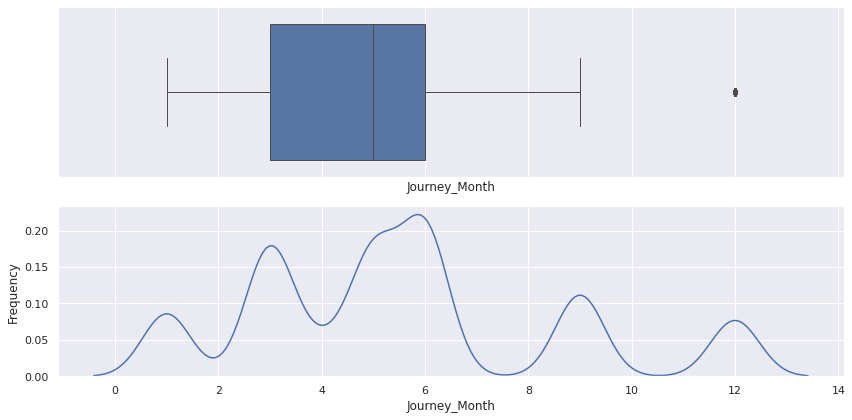

<Figure size 864x432 with 0 Axes>

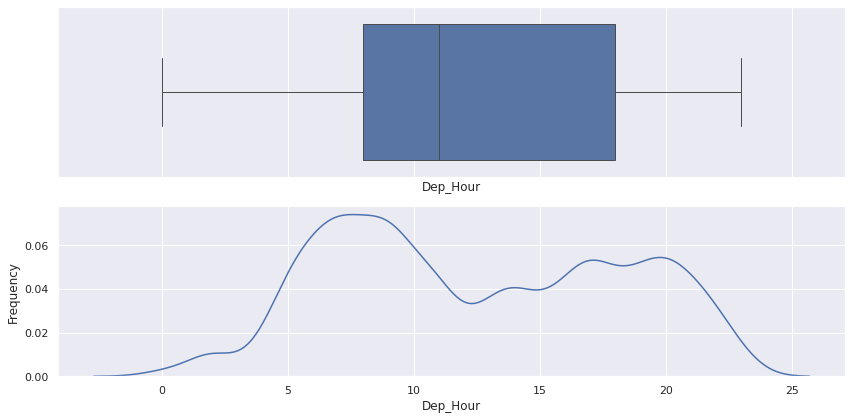

<Figure size 864x432 with 0 Axes>

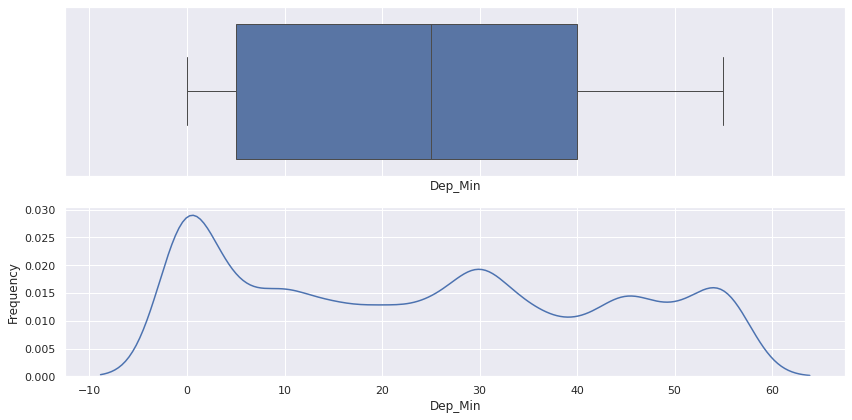

<Figure size 864x432 with 0 Axes>

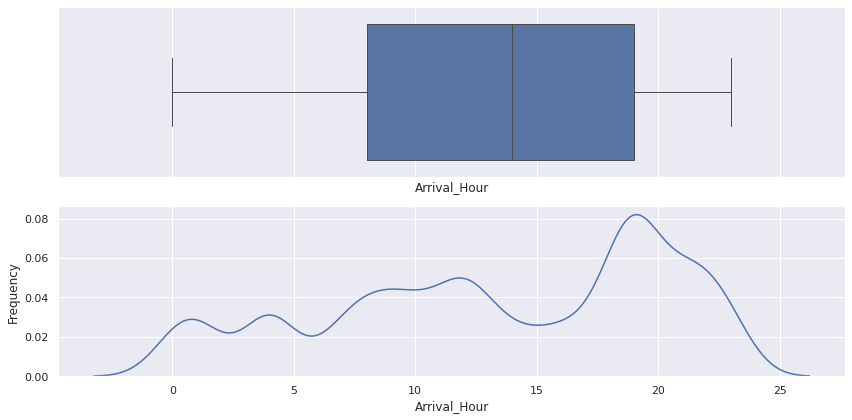

<Figure size 864x432 with 0 Axes>

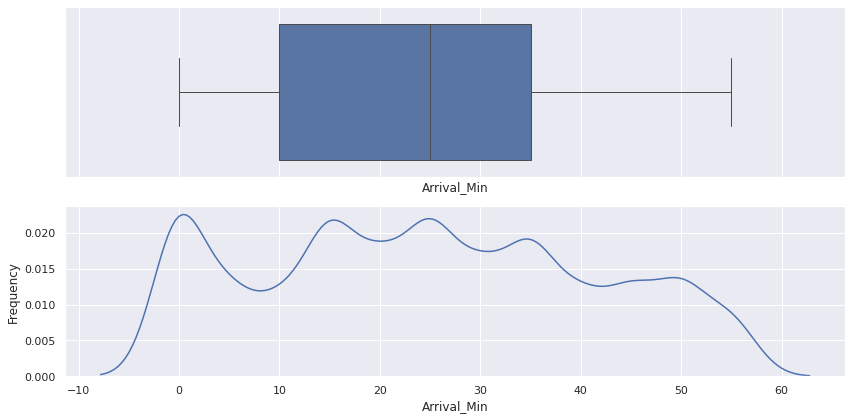

In [ ]:
#plotting box plot and distribution plot 
for i in df[column]:
  plt.figure()
  plt.tight_layout()
  sns.set(rc={"figure.figsize":(12, 6)})

  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
  plt.gca().set(xlabel= i,ylabel='Frequency')
  sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
  sns.kdeplot(df[i])

#####considering only duration column for outlier removal
#####Duration is rightly skewed distribution,hence using IQR method to renmove outliers
---



In [ ]:
# Finding IQR
percentile_25 = df['Duration'].quantile(0.25)
percentile_75 = df['Duration'].quantile(0.75)



In [ ]:
IQR = percentile_75 - percentile_25
IQR

740.0

In [ ]:
upper_limit = percentile_75 + 1.5 * IQR
lower_limit = percentile_25 - 1.5 * IQR
print('upper limit' ,upper_limit)
print('lower_limit' ,lower_limit)


upper limit 2020.0
lower_limit -940.0


In [ ]:
# removing outliers
df_new=df[(df['Duration'] > upper_limit) | (df['Duration'] < lower_limit)]
df_new.shape

(75, 14)

In [ ]:
df = df[~(df['Duration'] > upper_limit) | (df['Duration'] < lower_limit)]
df.shape

(10386, 14)

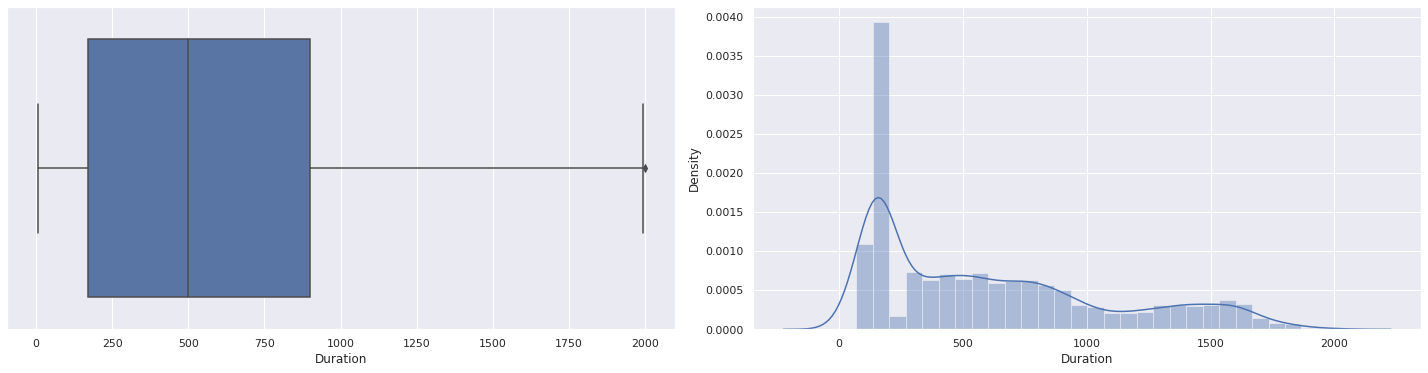

In [ ]:
# checking distribution of Duration column after removing outliers
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.boxplot(df['Duration']);

plt.subplot(2,2,2)
sns.distplot(df['Duration'])
plt.show()

### Splitting input and output variable

In [ ]:
X = df.drop(columns=['Price'],axis = 1)

In [ ]:
X.shape,df.shape

((10386, 13), (10386, 14))

In [ ]:
Y = df['Price']
Y.shape,df.shape

((10386,), (10386, 14))

In [ ]:
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,3,1,16,50,21,35


### Importing Column Transformers

####Separating numerical and categorical columns

In [ ]:
numeric_data = list(df.select_dtypes(include=[np.number]).columns)
categorical_data = list(df.select_dtypes(exclude=[np.number]).columns)

In [ ]:
numeric_data

['Duration',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

In [ ]:
categorical_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    X[i] = le.fit_transform(X[i])
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,170,4,6,24,3,22,20,1,10
1,1,3,0,83,445,1,6,5,1,5,50,13,15
2,4,2,1,117,1140,1,6,6,9,9,25,4,25
3,3,3,0,90,325,0,6,5,12,18,5,23,30
4,3,0,2,29,285,0,6,3,1,16,50,21,35


**Price and duration are continous numerical data with skewed nature. Out of which Price is target variable, so ingore it.** 

**We gone transform duration. For rest others we gone ignore skewness present as they discrete numerical and categorical feature**

In [ ]:
X['Duration'] = np.log1p(X['Duration'])

##Correlation

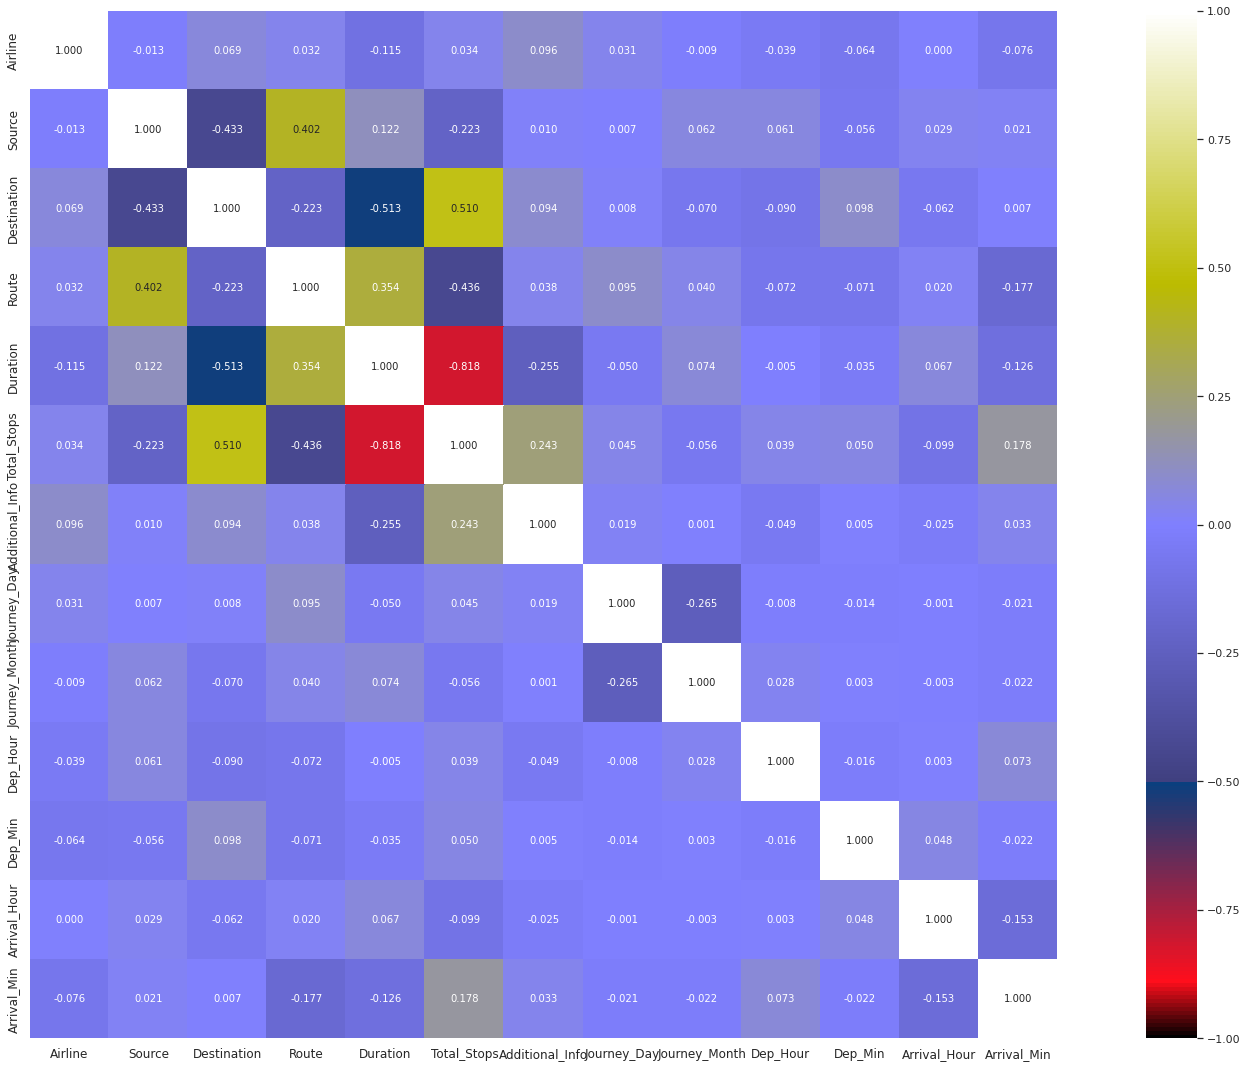

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()